In [1]:
using SpecialFunctions
using Plots
include("../src/Distribution/binomial.jl")
include("../src/Distribution/beta.jl")

beta_hpd (generic function with 3 methods)

$n$ 人を調査し、$y$人が○○と回答する。この事象は、$ binom(n,y, \theta) $ に従う。というような調査を想定。  
$t$回目で得られた事後確率を、$t+1$回目の事前確率とし、ベイズの方法で事後確率を更新していく。

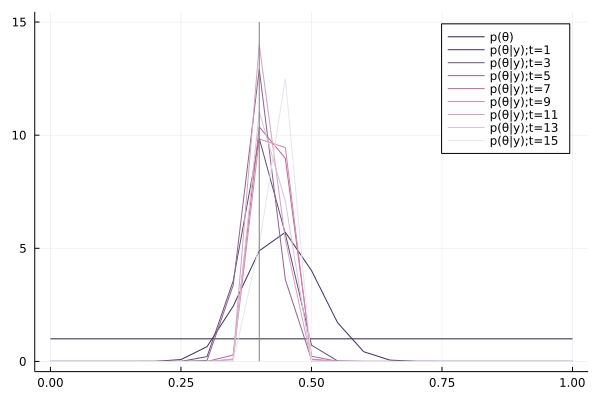

In [2]:
let
    n = 50
    θ = 0.4
    #ベータ分布パラメータ
    a = 1
    b = 1
    # グラフの横軸範囲
    θ_range = collect(0.0:0.05:1.0)
    # 事前確率プロット
    plt = plot(θ_range, θ -> beta_pdf(θ,a,b), label="p(θ)", linecolor=palette(:acton)[1])
    p_max = 0.0 # 事後確率p(θ|y)の最大値
    loop_max = 15
    step_palette = Int(floor(length(palette(:algae))/loop_max))
    for t in 1:loop_max
        # 調査実施(2項分布乱数)
        y = binom_inv(n, θ, rand())
        # ベータ分布パラメータ更新
        a = a + y
        b = b + n - y
        # 事後確率
        post_ps = map(θ -> beta_pdf(θ, a, b), θ_range)
        p_max = max(p_max,maximum(post_ps))
        # 事後確率プロット
        if t % 2 != 0
            plot!(plt, θ_range, post_ps, label="p(θ|y);t=$t", linecolor=palette(:acton)[t*step_palette])
        end
    end
    # θの縦線
    plot!(plt, [θ,θ], [0,p_max+1], label="", linecolor=:gray)
    plot(plt, fmt=:png)
end